# Part I - (ProsperLoan Exploration)
## by (Ibrahim SHITTU)

## Introduction
> This project explores Prosper Loan dataset and try to answer question on relationship between variables of interest. The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan from the year 2009 to 2014. There are two main categories:

> Borrower information: Basic attributes of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.

> Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper score and bank card utilization, etc.

> Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do this by considering a number of factors, noteworthy example is  a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Download and read prosper Loan Data file
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response = requests.get(url)
with open('prosperLoanData.csv', mode ='wb') as file:
    file.write(response.content)
    
    #Read CSV file
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
print(loan.head())

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
# selecting column of interest by Subseting the loan dataframe 
int_cols = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'Term', 
            'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'Occupation', 'EmploymentStatus']
loan_df = loan[int_cols]

loan_df.head()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus
0,9425,0.16516,0.1580,3083.333333,36,NaN,NaN,NaN,Other,Self-employed
1,10000,0.12016,0.0920,6125.000000,36,6.0,A,7.0,Professional,Employed
2,3001,0.28269,0.2750,2083.333333,36,NaN,NaN,NaN,Other,Not available
3,10000,0.12528,0.0974,2875.000000,36,6.0,A,9.0,Skilled Labor,Employed
4,15000,0.24614,0.2085,9583.333333,36,3.0,D,4.0,Executive,Employed


In [5]:
# view the statistics
loan_df.describe()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,ProsperRating (numeric),ProsperScore
count,113937.00000,113912.000000,113937.000000,1.139370e+05,113937.000000,84853.000000,84853.000000
mean,8337.01385,0.218828,0.192764,5.608026e+03,40.830248,4.072243,5.950067
std,6245.80058,0.080364,0.074818,7.478497e+03,10.436212,1.673227,2.376501
min,1000.00000,0.006530,0.000000,0.000000e+00,12.000000,1.000000,1.000000
25%,4000.00000,0.156290,0.134000,3.200333e+03,36.000000,3.000000,4.000000
50%,6500.00000,0.209760,0.184000,4.666667e+03,36.000000,4.000000,6.000000
75%,12000.00000,0.283810,0.250000,6.825000e+03,36.000000,5.000000,8.000000
max,35000.00000,0.512290,0.497500,1.750003e+06,60.000000,7.000000,11.000000


In [68]:
# Convert ProsperRating and Employment status into ordered categorical types
props_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = props_rating)

loan_df['ProsperRating'] = loan_df['ProsperRating (Alpha)'].astype(ordered_var)

pd.options.mode.chained_assignment = None  # default='warn'

In [12]:
# see number of null values on each columns
loan_df.isnull().sum()

LoanOriginalAmount             0
BorrowerAPR                   25
BorrowerRate                   0
StatedMonthlyIncome            0
Term                           0
ProsperRating (numeric)    29084
ProsperRating (Alpha)      29084
ProsperScore               29084
Occupation                  3588
EmploymentStatus            2255
ProsperRating              29084
dtype: int64

In [6]:
# filter out loans without BorrowerAPR and ProsperScores
loan_df = loan_df[loan_df['BorrowerAPR'].isnull()==False]
loan_df = loan_df[loan_df['ProsperScore'].isnull()==False]

### What is the structure of your dataset?

> The dataset has a total of 113937 loans entries with 81 attributes. Each loan contain information on the borrower's background information and details regarding the loans!

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in features that are best for predicting the borrower's Annual Percentage Rate (APR) for any loan. The Annual Percentage Rate (APR) is the cost you pay each year to borrow money, including fees, expressed as a percentage. Hence, the APR is a broader measure of the cost to you of borrowing money since it reflects not only the interest rate but also the fees that you have to pay to get the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The borrower rate, loan amount, the term of loan could show a signicant influence/relationship because the higher the APR, the more you'll pay over the life of the loan. employment status, prosper rating and score could also show significant relationship with APR

## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: BorrowerAPR. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

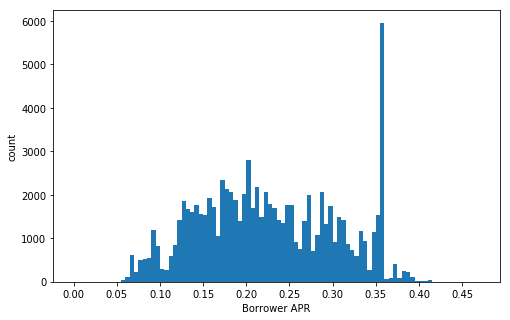

In [7]:
# BorrowerAPR Distribution
bins = np.arange(0, loan_df.BorrowerAPR.max()+0.05, 0.005)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('count');
plt.xticks(np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.05));

The distribution of APR looks multimodal. There is roughly one normal distribution with exceptional high counts when BorrowerAPR is between 0.35 and 0.36. Only very few loans have APR greater than 0.40.

Next, create a plot look at the distribution of Loan amount lended by Prosper. Is there an interesting pattern in these values?

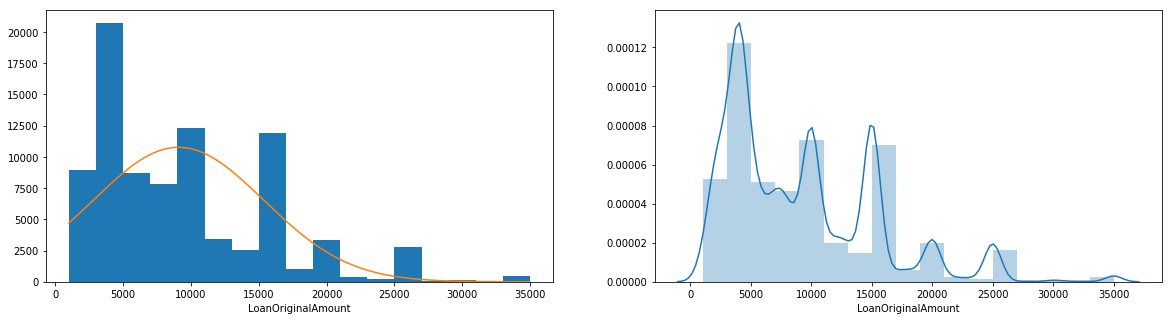

In [8]:
# plotting the distribution of Loan amounts
plt.figure(figsize = [20, 5])

plt.subplot(1,2,1)
bin_size = 2000
bin_edges = np.arange(1000, 35000 + bin_size, bin_size)
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bin_edges);
plt.xlabel('LoanOriginalAmount')
# overlay a theoretical normal distribution on top
loan_mean = loan_df['LoanOriginalAmount'].mean()
loan_sd = loan_df['LoanOriginalAmount'].std()

from scipy.stats import norm
x = np.linspace(1000, 35000, 2000)
y = norm.pdf(x, loan_mean, loan_sd) # normal distribution heights
y *= loan_df.shape[0] * bin_size # scale the distribution height

plt.plot(x, y);

# plot distribution using the population dataset 
plt.subplot(1,2,2)
sb.distplot(loan_df['LoanOriginalAmount'], hist_kws = {'alpha' : 1/3}, bins = bin_edges)
plt.show();

The bell curve can help us see if there is a normal distribution underneath which is not the case as we can see in the subplot using the density line.

The Loan Amount distribution is clearly peaking around 5,000$ from the visualisation above

Now, let's move on to exploring the other features of interest: 'BorrowerRate', 'Term', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'Occupation', 'EmploymentStatus'. For each of these measures, how are they disbributed and what correlation would they have with BorrowerAPR

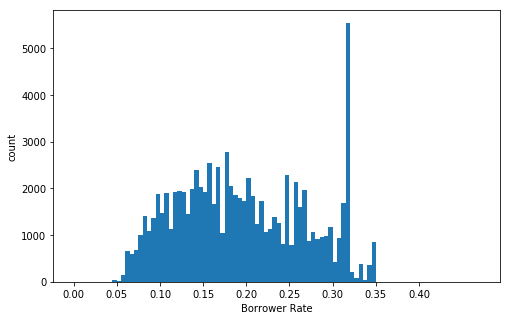

In [9]:
# BorrowerRate Distribution
bins = np.arange(0, loan_df.BorrowerAPR.max()+0.05, 0.005)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate')
plt.ylabel('count');
plt.xticks(np.arange(0, loan_df['BorrowerRate'].max()+0.05, 0.05));

The borrower rate also take same shape as borrower apr with exceptional peak point arround 0.32 

We plot next for loan tenure

In [58]:
# see Tenure of most loans received/disbursed
def myCountPlot(df, xVar, color = sb.color_palette()[0], order = None):
    
    
    # set plot dimension
    plt.figure(figsize = [14, 6])
    # base_color = sb.color_palette()[0]
    sb.countplot(data=loan_df, x= xVar, edgecolor='black', color=color, order=order);
    #clean up variable name
    xVar=xVar.replace("_"," ") #replace _ with space
    #Add a Title
    plt.title(f'''Distribution of {xVar}'''.title(),fontsize=14, weight= 'bold')
    # Add x label and format it
    plt.xlabel(xVar.title(),fontsize = 10, weight= 'bold')
    # Add x label and format it 
    plt.ylabel('Frequency'.title(),fontsize = 10, weight= 'bold')

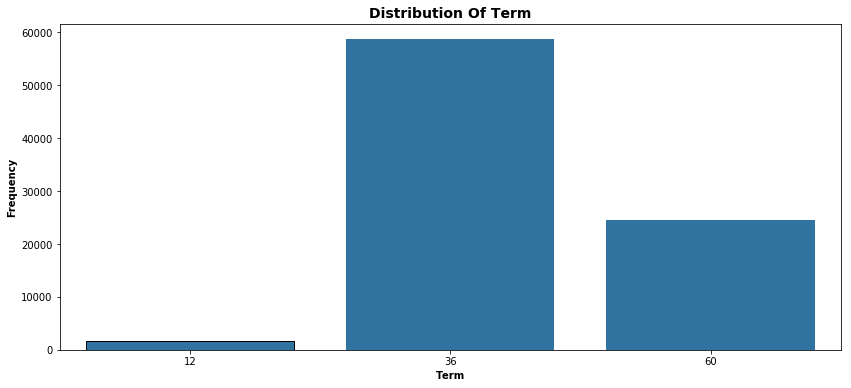

In [59]:
Plot tenure Distribution
myCountPlot(loan_df, 'Term')

Loan repayment schedule can only be for a maximum period of 5years with other allowable tenure being either 1 year or 3 years tenure. As shown above most of the loans taken by borrowers had a 3 years years tenure.

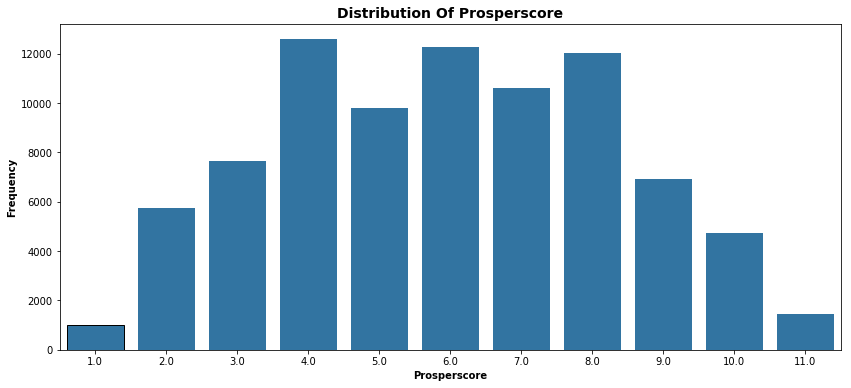

In [60]:
# Plot the bar see which ProsperScore borrowers received the most
myCountPlot(loan_df, 'ProsperScore')

Most Loans have mid-range risk score between 4.00 - 8.00 with the lowest count on the highest and lowest risk score.

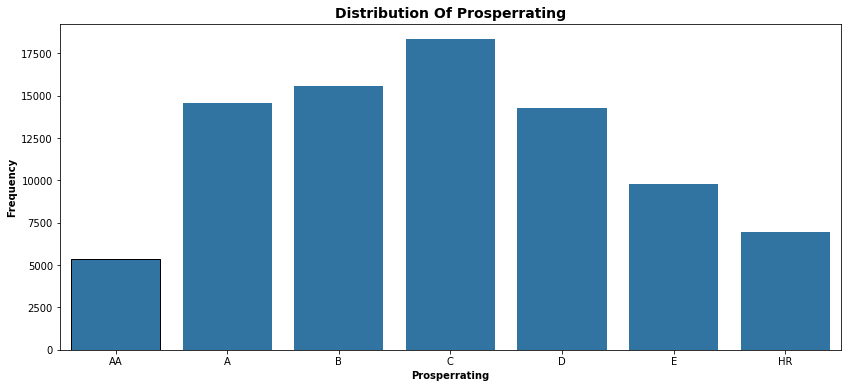

In [71]:
#Plot ordinal variable distribution 'ProsperRating'

myCountPlot(loan_df, 'ProsperRating')

As we see above that the highest frequency count takes a C Prosper Rating while the lowest takes AA rating

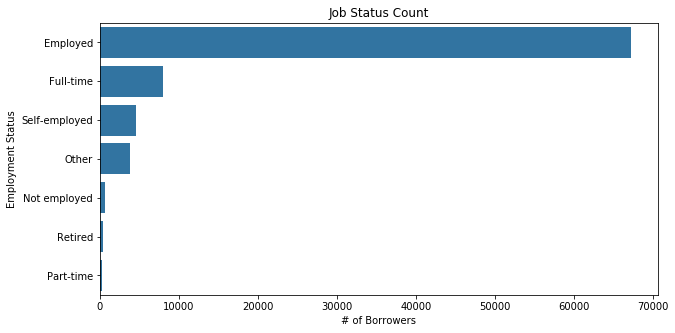

In [14]:
# Plot for EmploymentStatus and 
plt.figure(figsize=[10, 5])

base_color = sb.color_palette()[0]

# Ordering
emp_order = loan_df['EmploymentStatus'].value_counts().index
#Plot
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color, order=emp_order)
plt.title('Job Status Count')
plt.xlabel('# of Borrowers')
plt.ylabel('Employment Status');

As evident above most loans were disbured to employed people. we can check further the jobtitle/occupation of these employed borrowers

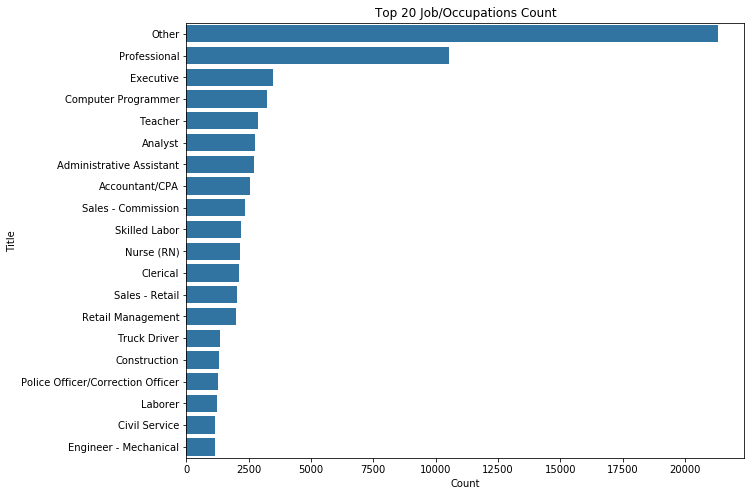

In [78]:
# Plot for Top JobTitle/Occupation of Borrowers
plt.figure(figsize=[10, 8])

base_color = sb.color_palette()[0]

# Ordering
emp_order = loan_df['Occupation'].value_counts().iloc[:20].index
#Plot
sb.countplot(data = loan_df, y = 'Occupation', color = base_color, order=emp_order)
plt.title('Top 20 Job/Occupations Count')
plt.xlabel('Count')
plt.ylabel('Title');

Above is top 20 Job/Occupational Title of borrowers at Prosper

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of both APR and Rate are multimodial with an exceptional peak point occassioned by the count of loan that took on the value.!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The cleaning efforts were majorly on the proper sequencing of categorical data to make more intuitive sense!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

let's start by looking at the pairwise correlations present between features in the data. I will investigate the relationships between numerical variables to see if any particular pairs have strong correlations.

In [16]:
list(loan_df)

['LoanOriginalAmount',
 'BorrowerAPR',
 'BorrowerRate',
 'StatedMonthlyIncome',
 'Term',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'Occupation',
 'EmploymentStatus',
 'ProsperRating']

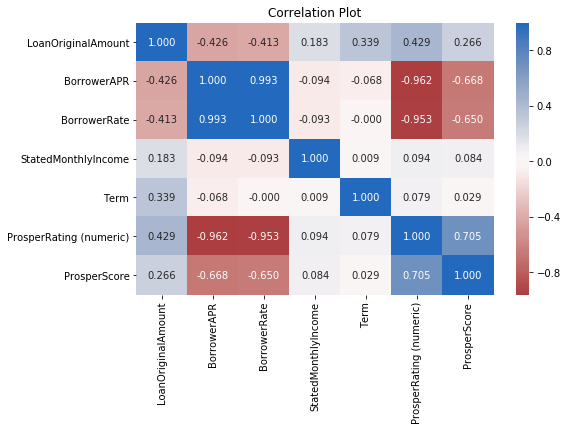

In [11]:
# correlation plot 

num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'Term',
            'ProsperRating (numeric)','ProsperScore']

plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

As shown above, BorrowerRate and ProspeRating have strong correlation with BorrowerAPR. While LoanAmount and prosper a weak but significant correlation with APR

Let's explore the features with sgnificant correlation with APR a bit more by fitting them in a scatter regression plot

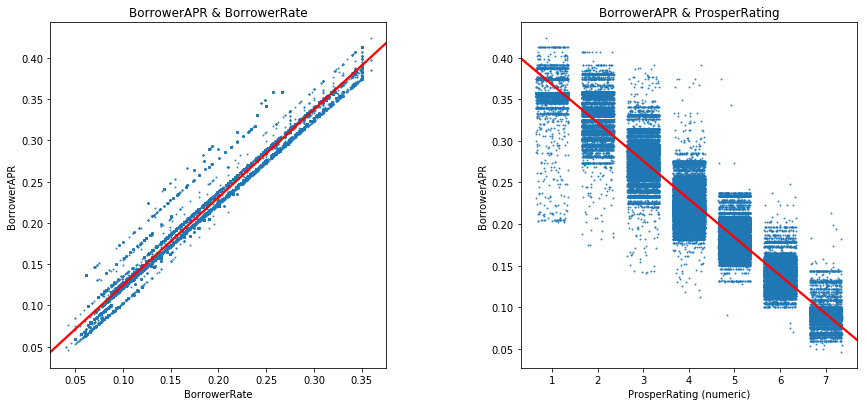

In [94]:
#Plot of features with strong correlation
plt.figure(figsize=[14, 6])
#samples = loan_df.sample(500,replace = False)

# Borrower APR vs BorrowerRate
plt.subplot(1,2,1)
sb.regplot(x="BorrowerRate", y="BorrowerAPR", data=loan_df, 
           scatter_kws= {'s' :1}, line_kws={'color': 'red'});
plt.title('BorrowerAPR & BorrowerRate');

# Borrower APR vs ProsperRating
plt.subplot(1,2,2)

sb.regplot(x="ProsperRating (numeric)", y="BorrowerAPR", data=loan_df, x_jitter=0.35, 
           scatter_kws= {'s':1}, line_kws={'color': 'red'});
plt.title('BorrowerAPR & ProsperRating');

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

As shown above, the plot and regression line is clear about the direction of relationship. while BorrowerRate depicts a positive relationship with APR, Prosperating demonstrates a negative relationship with Apr

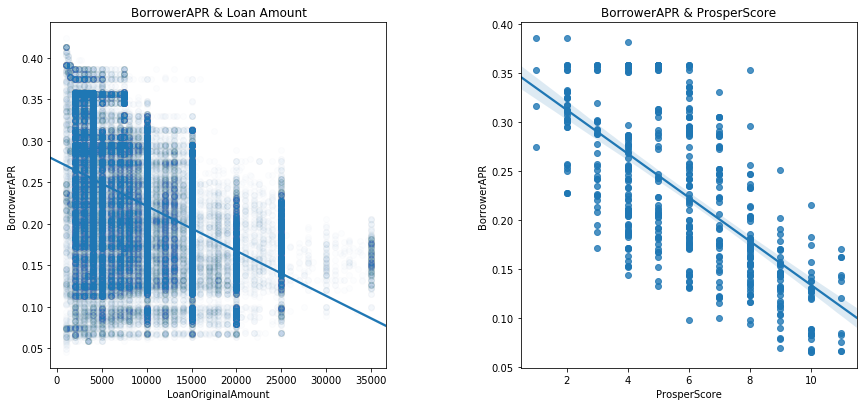

In [16]:
#plot of features with weak but significant relathionship with APR
plt.figure(figsize = [14, 6])
# APR and Loan Amount
#samples = loan_df.sample(1000,replace = False)
plt.subplot(1,2,1)
sb.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('BorrowerAPR & Loan Amount');

# Borrower APR vs ProsperRating
plt.subplot(1,2,2)
samples = loan_df.sample(500,replace = False)
sb.regplot(x="ProsperScore", y='BorrowerAPR', data=samples);
plt.title('BorrowerAPR & ProsperScore');

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

There's a patterned negative relationship between Loan Amount and Borrower APR, which means large loans have relatively less annual interest rate from the borrower. This partern is also true for the relationship between ProsperScore and APR

Now we look at some the relationship between some quantitative feature and APR

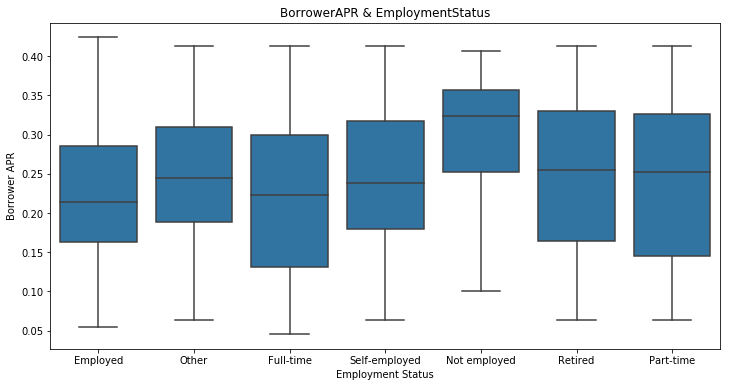

In [22]:
# Borrower APR vs Employment status
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data=loan_df ,y='BorrowerAPR', x='EmploymentStatus', color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

As shown above, on the average, unemployed borrower have higher APR than the other categories

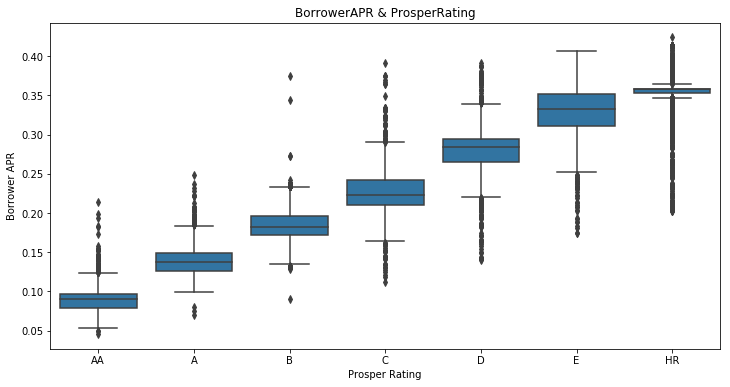

In [21]:
# Borrower APR vs ProsperRating
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data=loan_df ,y='BorrowerAPR', x='ProsperRating', color=base_color);
plt.title('BorrowerAPR & ProsperRating');
plt.ylabel('Borrower APR');
plt.xlabel('Prosper Rating');

The plot shows that the higher the rating the lower the APR which correlates with the result shown through ProsperScore and Numeric Prosper Ratings

In [ ]:
Now we would look at the relationship between APR and Term of the loan

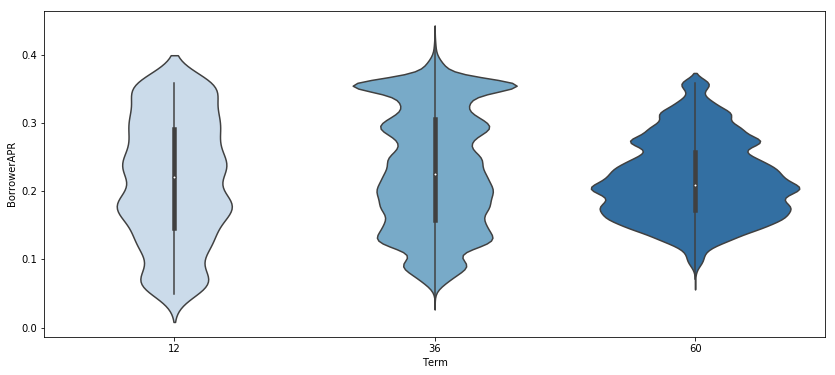

In [16]:
# BorrowerApr Vs. Loan Term
plt.figure(figsize = [14, 6])
sb.violinplot(x="Term", y="BorrowerAPR", data=loan_df, palette = 'Blues');

We can observe that loans booked of a period of 36 months have higher APR

Also, Let's look at the loan amount disbursed by employment status

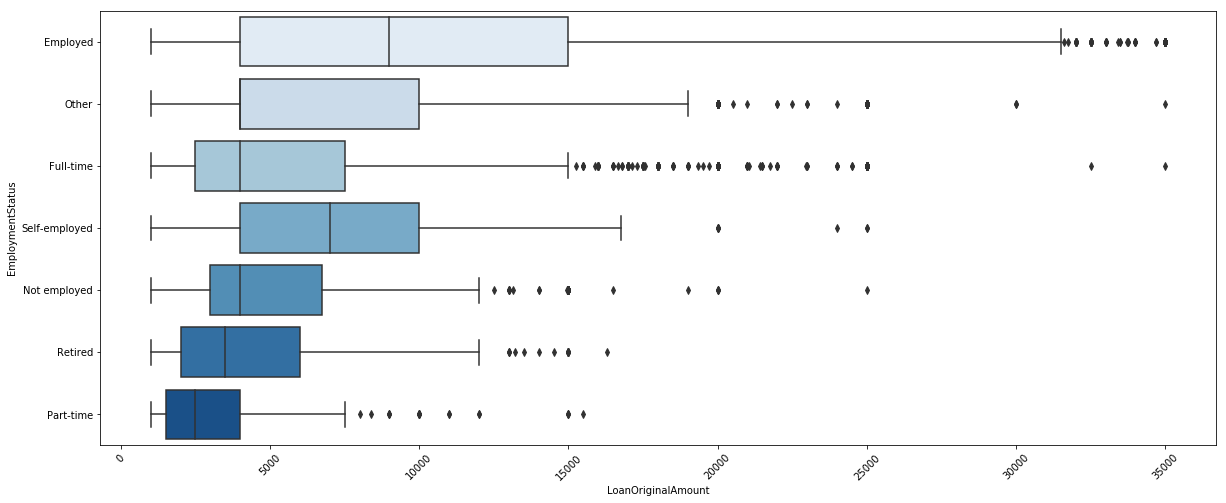

In [11]:
# plot of loan amount by employment status
fig = plt.figure(figsize = [20,8])
sb.boxplot(data=loan_df,x='LoanOriginalAmount', y='EmploymentStatus', palette = 'Blues', dodge=0.3,);
plt.xticks(rotation=45);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

Generally, employed borrowers are granted higher amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower rate had a strong positive relationship with APR meaning higher rate translate to more cost of borrowing while ProsperRating had a stong negative relationship with APR. Also, Loan Amount had a generally fair negative relationship with APR which means that higher loan value pay borrowing less cost!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Employed borrowers gets higher loan values perhaps for their ability to pay on account of a visible means of income to service the loan!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

let's start by looking at the relationship between BorrowerAPR and BorrowerRating with a third variable which is; How the Term of the loan affect primary variable of interest

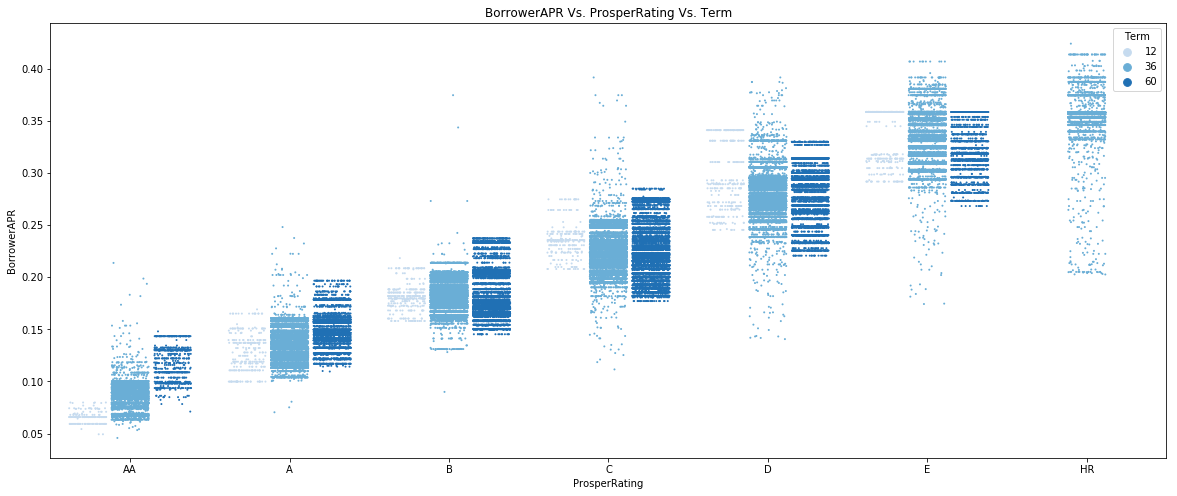

In [73]:
# Borrower Rate by Prosper rating and Loan terms
#plot pointplot 
fig = plt.figure(figsize = [20,8])
sb.stripplot(data = loan_df, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', 
             jitter = 0.35, dodge = True, size=2)
plt.title('BorrowerAPR Vs. ProsperRating Vs. Term');

The longer the Term, ther Higher the APR with the highest occuring on loans booked for 36month

Next we look at BorrowerAPR With BorrowerRate with a third variable LoanOriginalAmount to see their relationship

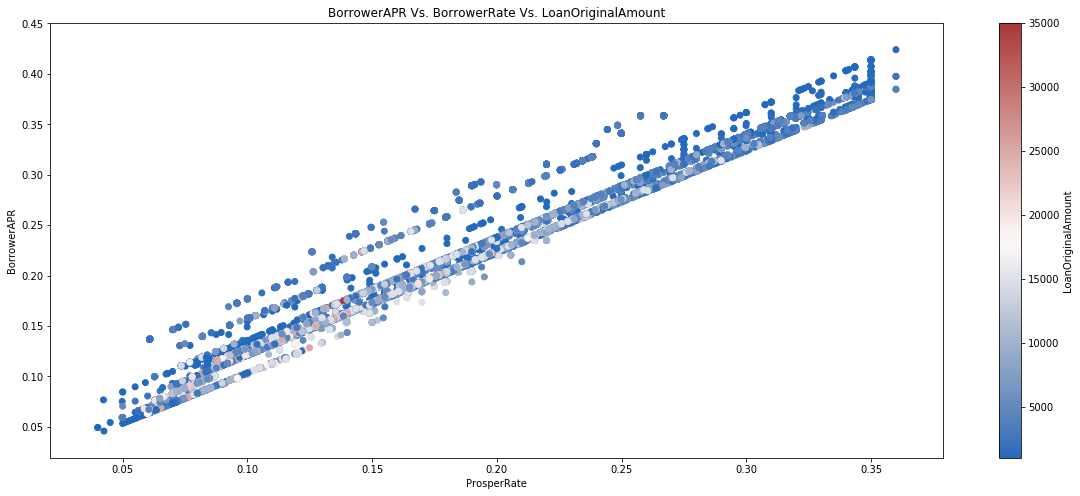

In [13]:
# BorrowerAPR Vs. BorrowerRate & LoanAmount
plt.figure(figsize = [20, 8]) 

plt.scatter(data=loan_df, x='BorrowerRate',y='BorrowerAPR',c='LoanOriginalAmount', cmap='vlag')
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR Vs. BorrowerRate Vs. LoanOriginalAmount')
plt.xlabel('ProsperRate')
plt.ylabel('BorrowerAPR');

While BorrowerAPR and BorrowerRate are positively correlated i.e the higher the rate, the higher the Apr. Borrowers with higher loan amount generally pay less APR and Rate

Now we look at loan distribution by employment status of borrowers and scheduled repayment period

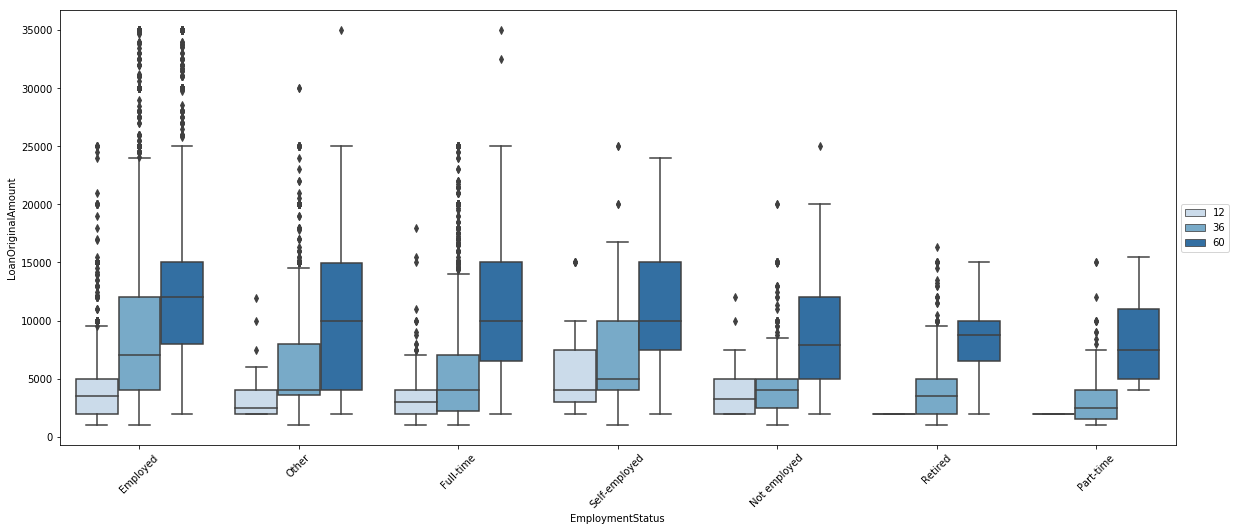

In [13]:
# LoanAmount Vs EmploymentStatus and Loan Terms
fig = plt.figure(figsize = [20,8])
sb.boxplot(data=loan_df,x='EmploymentStatus',y='LoanOriginalAmount',hue='Term', palette = 'Blues', dodge=0.3,);
plt.xticks(rotation=45);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

Higher Loan values are granted to majorly Employed borrower and their repayment period is flexible between 12-60months. Whereas unemployed, retired and part-time worker borrowers majorly repay between 36-60 despite taking lesser loan amount 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Loans with higher values mostly accounted for by employed borrowers moslty pay lower APR and Rate. Also, there's different borrower cost applied depending on the rating score and the tenure!

### Were there any interesting or surprising interactions between features?

> Unemployed, retired and partime borrower despite the lower loan amount requestd generally prefer a longer term repayment period  as against employed borrows that's flexed between short and long term repayment period!

## Conclusions
> The eplored data sets out to investigate the factors that best explain and influence the cost of borrowing at Prosper by examing the distribution of each feature of interest on their merit and plotting relationships to generate insights.

> The finding showed that borrower rates, loan amount, prosperating have signifiacant influence on the cost of borrowing over time.
